In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [4]:
import cupy as cp

In [5]:
PROJECT_PATH = '../'
DATA_DIR = "/home/swei20/LV/data/"
PCA_PATH = '/scratch/ceph/dobos/data/pfsspec/import/stellar/rbf/bosz_5000_full/pca/spectra.h5'
NORM_PATH = "/scratch/ceph/szalay/swei20/AE/norm_flux_step4.h5"
sys.path.insert(0, PROJECT_PATH)

### Load data

In [6]:
with h5py.File(NORM_PATH, 'r') as f:
    flux0 = f['flux'][()]
    para0 = f['para'][()]
    wave0 = f['wave'][()]

In [7]:
flux0.shape, wave0.shape

((116614, 3850), (3850,))

In [8]:
from lv.base.dataloader_c import DataLoader

In [27]:
ds = DataLoader()

In [28]:
ds.prepare_data (flux0, wave0, para0, "L", "C", "T56", "L45", fix_CO=0)

Cupy flux: 2100, wave: 1563


# find masking 

In [29]:
u,w,v = ds._svd(ds.flux)

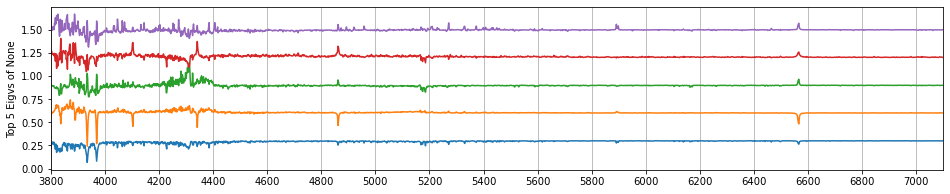

In [30]:
ds.plot_eigv(cp.asnumpy(v))

In [42]:
k,q,prom = 100, 0.8, 0.3
nvv= ds.get_peaks(k=k,q=q,prom=prom, out=1)

Text(0.5, 1.0, 'k=100, q=0.8, prom=0.3')

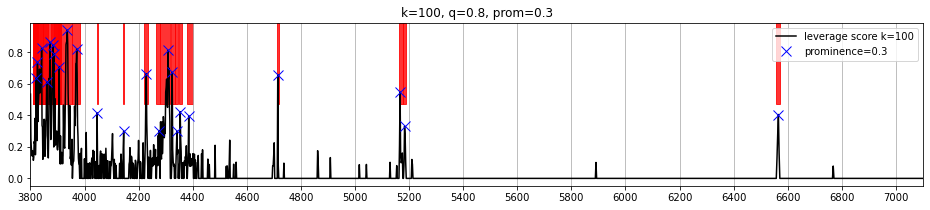

In [43]:
ds.plot_peaks(nvv, k, prom)
plt.title(f"k={k}, q={q}, prom={prom}")

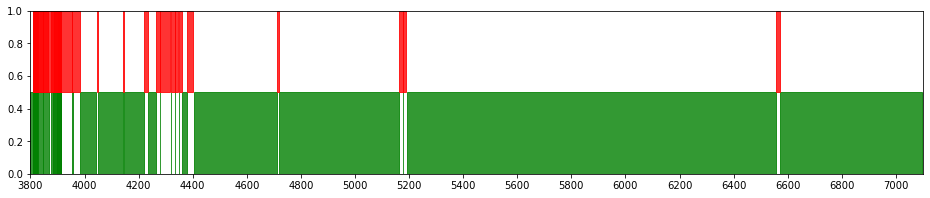

In [44]:
ds.plot_MN_mask()

In [45]:
# ds.plot_lick()

In [46]:
ds.get_MN(ds.mask, top=5)

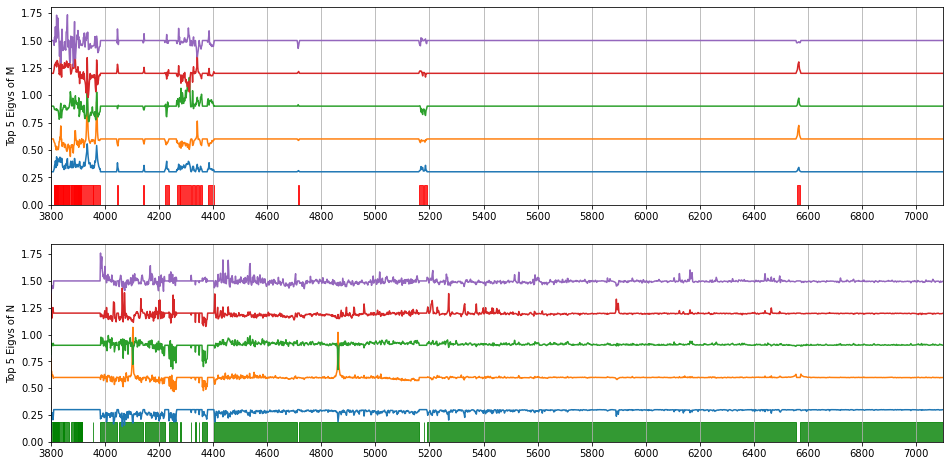

In [47]:
f, axs = plt.subplots(2,1,figsize=(16,8), facecolor="w")
ds.plot_MN(step=0.3, axs=axs)

In [48]:
ML, MS, MLv, MSv = ds._pcp(ds.M, delta=1e-6, mu=None, lam=None, norm=None, maxiter=1000)

4.414273 0.02182178902359924 154703.66


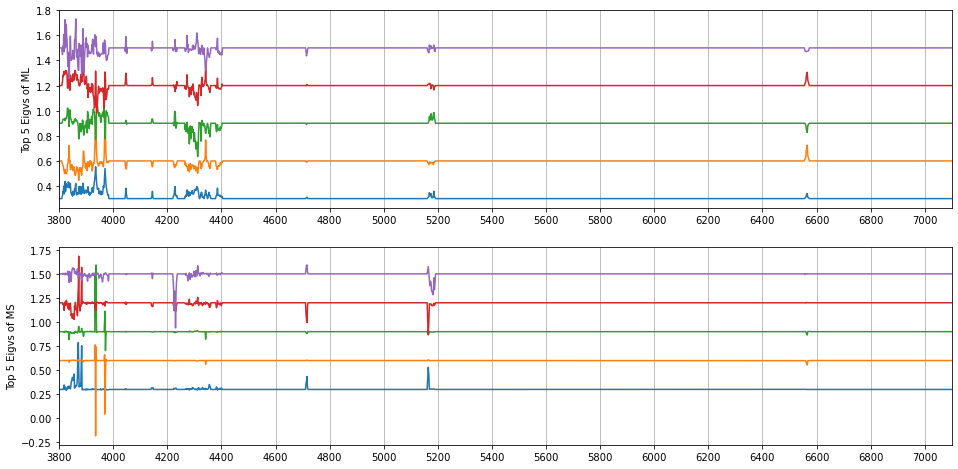

In [49]:
f, axs = plt.subplots(2,1,figsize=(16,8), facecolor="w")
ds.plot_eigv(MLv, name="ML", ax=axs[0])
ds.plot_eigv(MSv, name="MS", ax=axs[1])

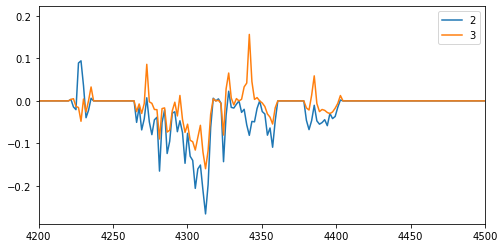

In [81]:
f, ax = plt.subplots(1, figsize=(8,4))
ds.plot_v(MLv, 2, ax=ax)
ds.plot_v(MLv, 3, ax=ax)
plt.xlim(4200,4500)
plt.legend()

In [55]:
NL, NS, NLv, NSv = ds._pcp(ds.N, delta=1e-6, mu=None, lam=None, norm=None, maxiter=100)

5.6322513 0.02182178902359924 29054.264


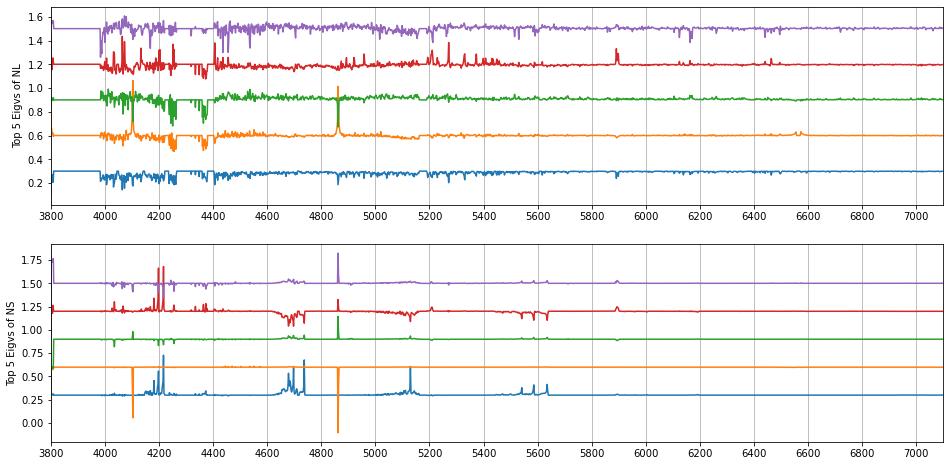

In [56]:
f, axs = plt.subplots(2,1,figsize=(16,8), facecolor="w")
ds.plot_eigv(NLv, name="NL", ax=axs[0])
ds.plot_eigv(NSv, name="NS", ax=axs[1])

In [57]:
ds.pcp_transform(MLv, MSv, NLv, NSv)

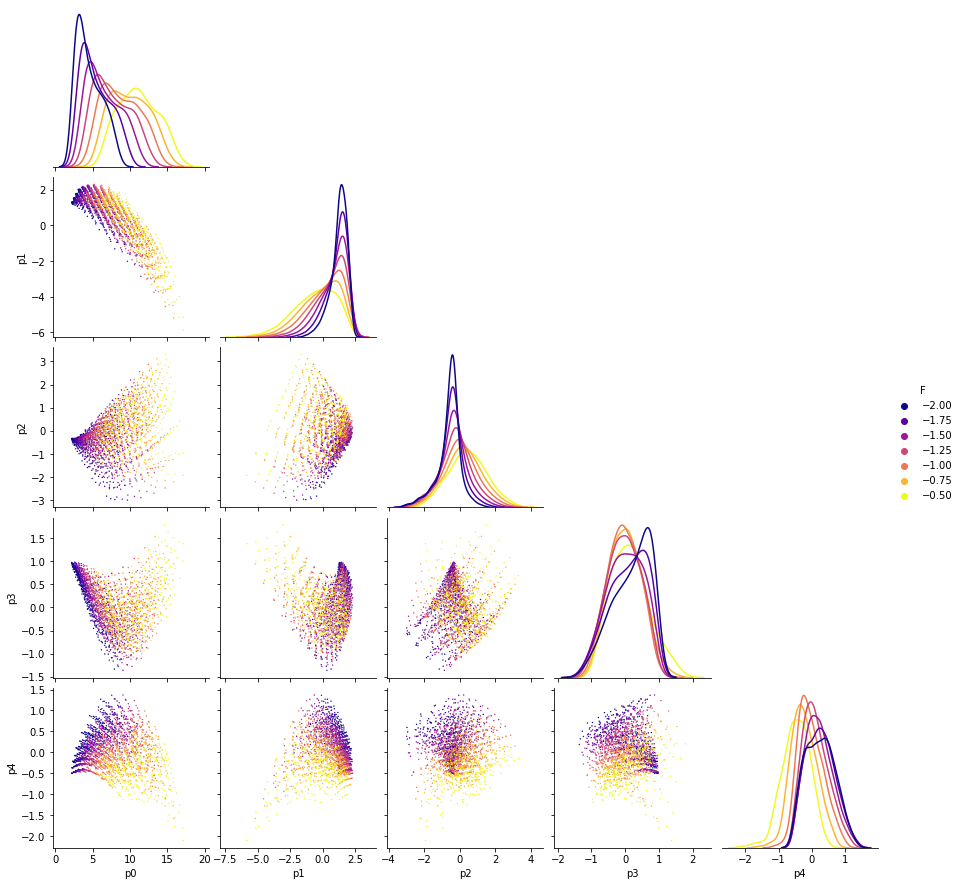

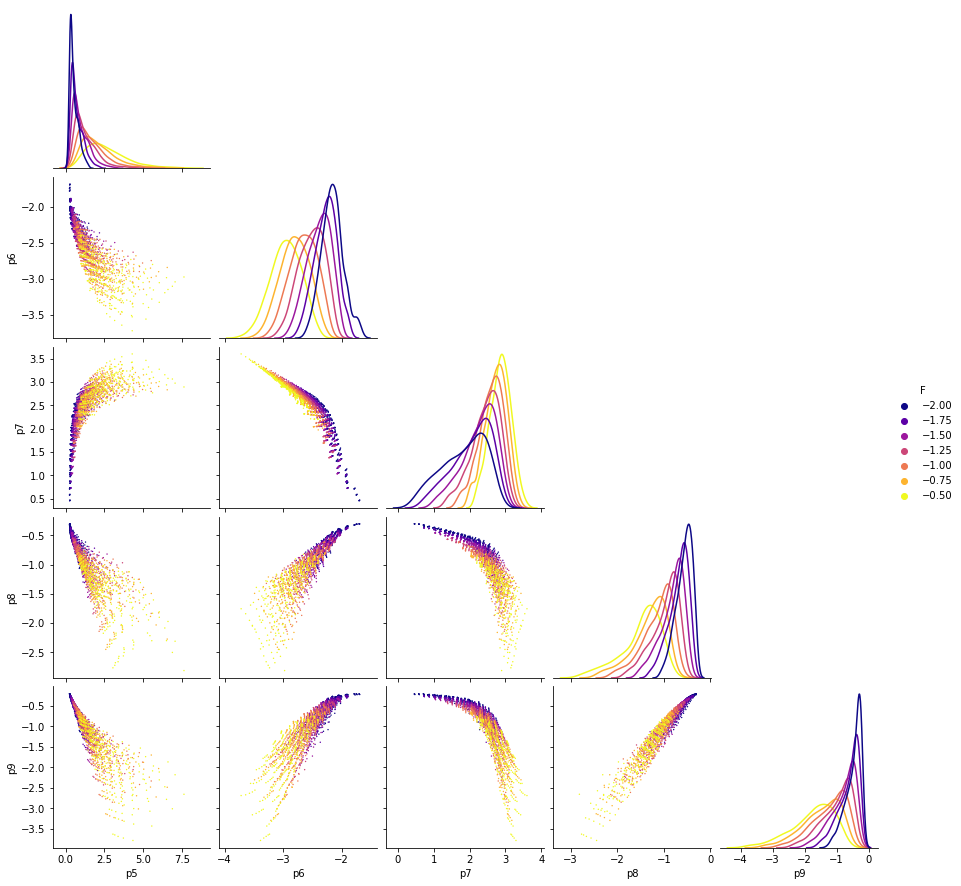

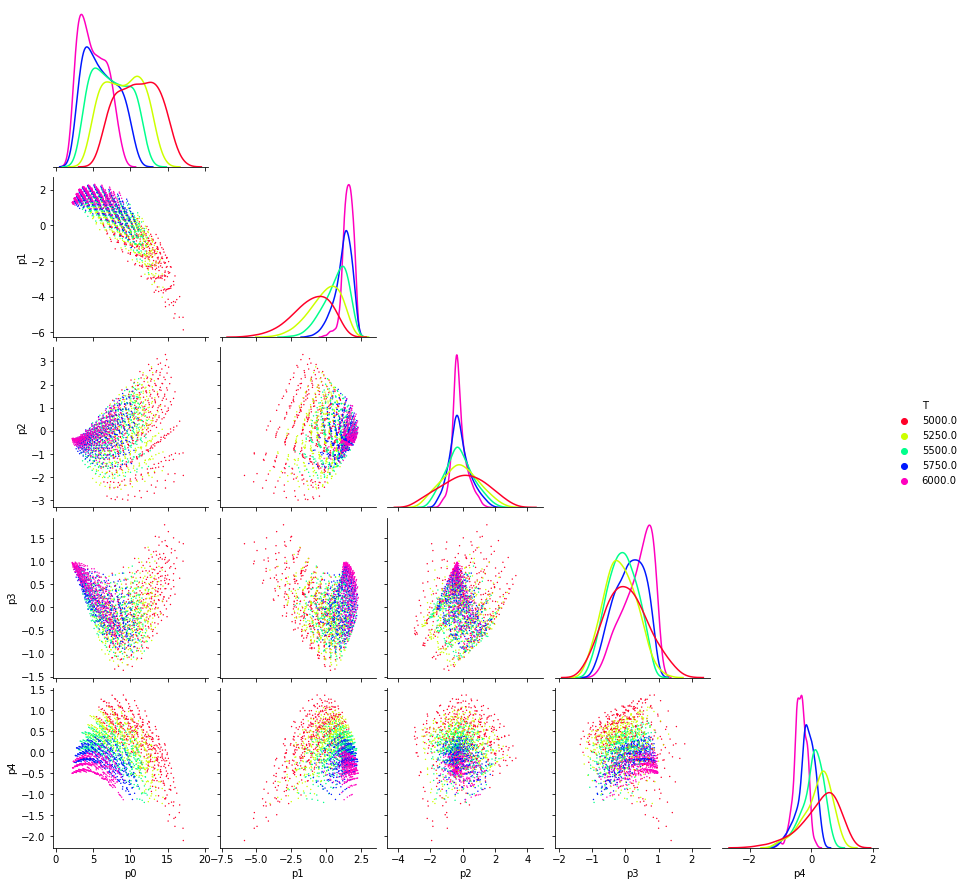

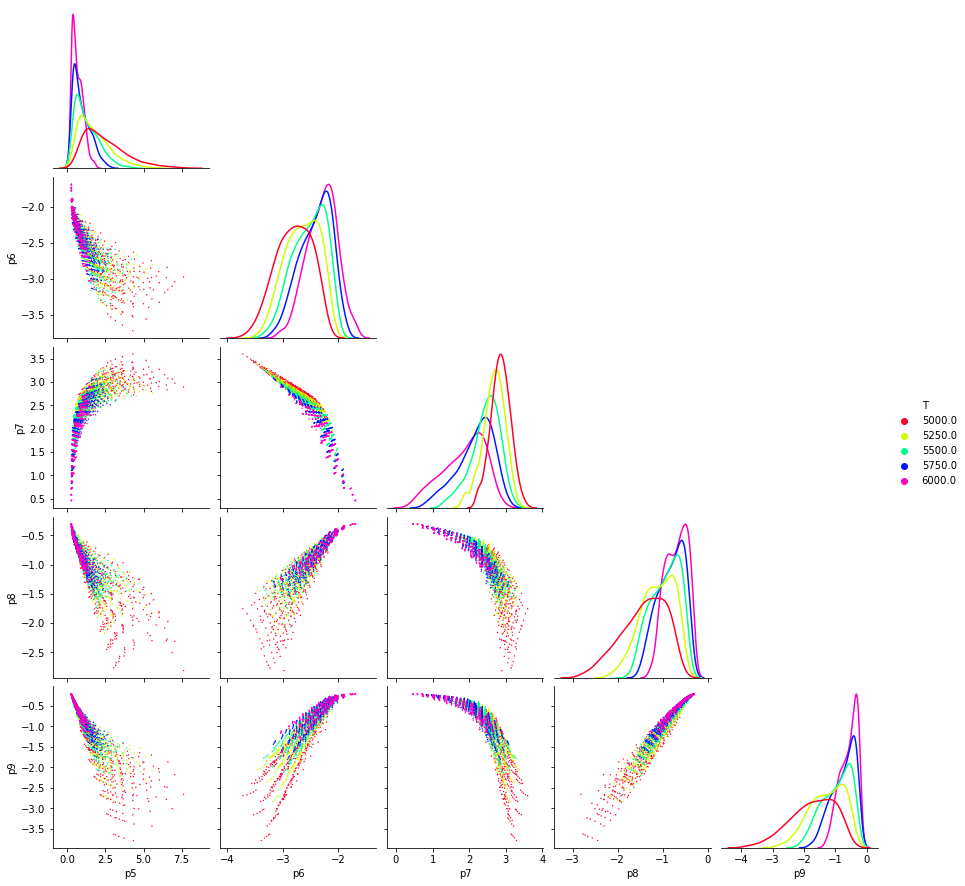

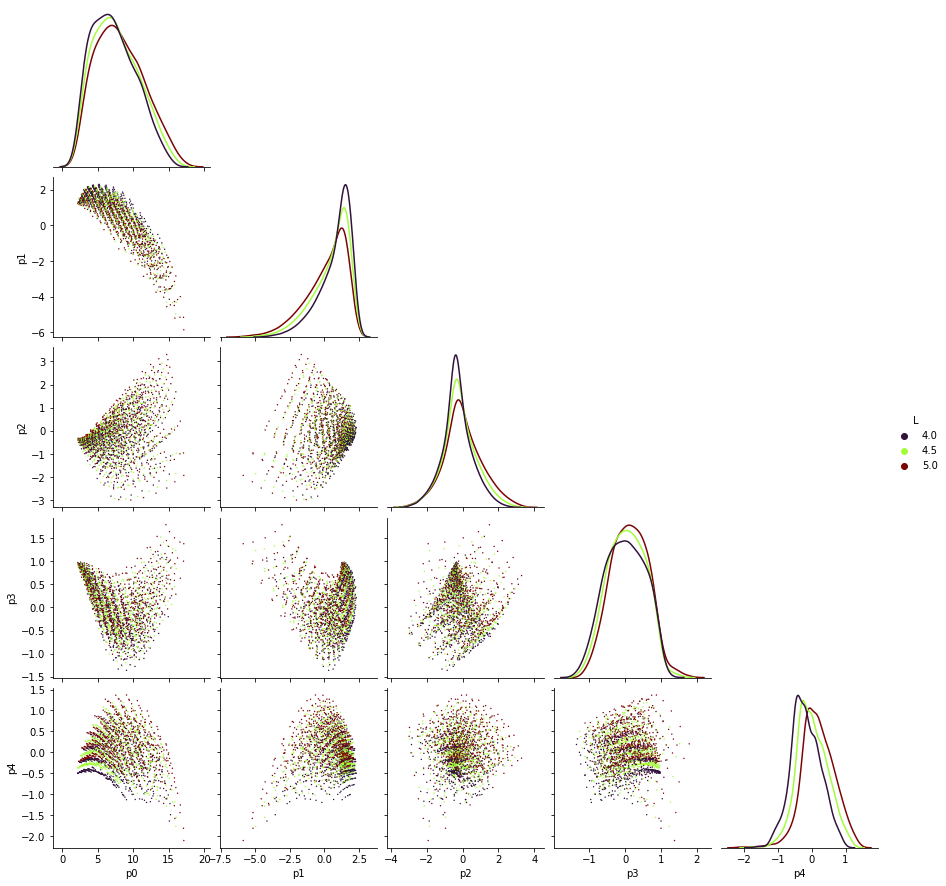

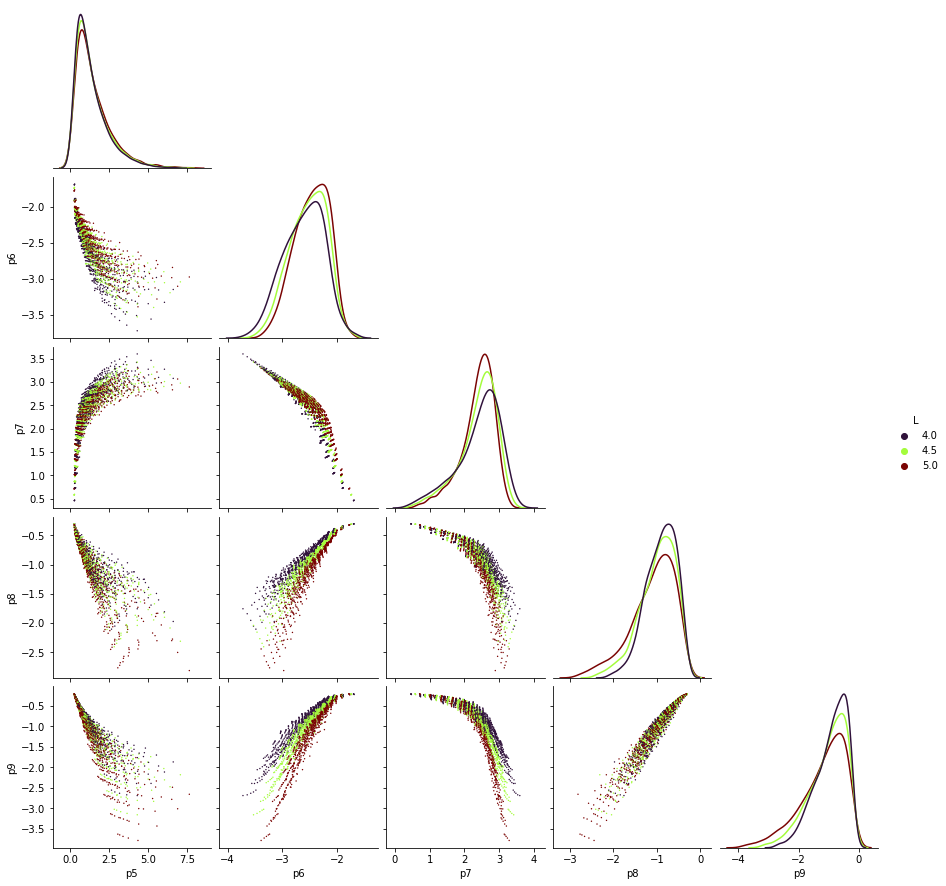

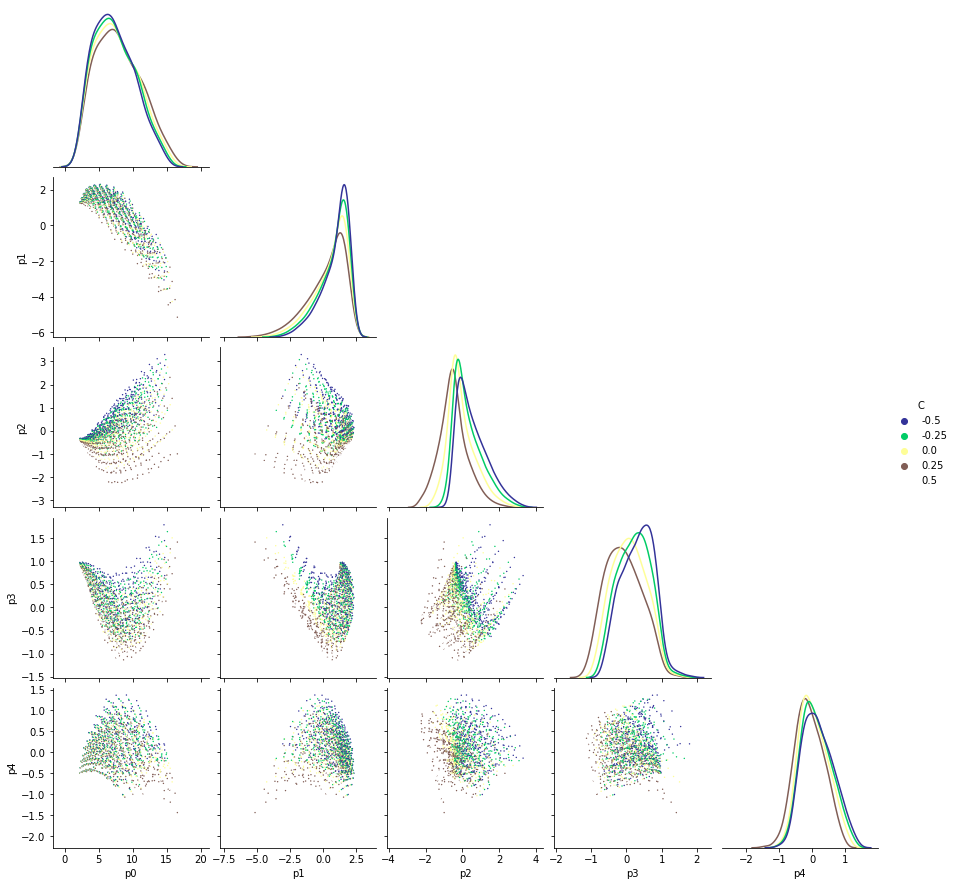

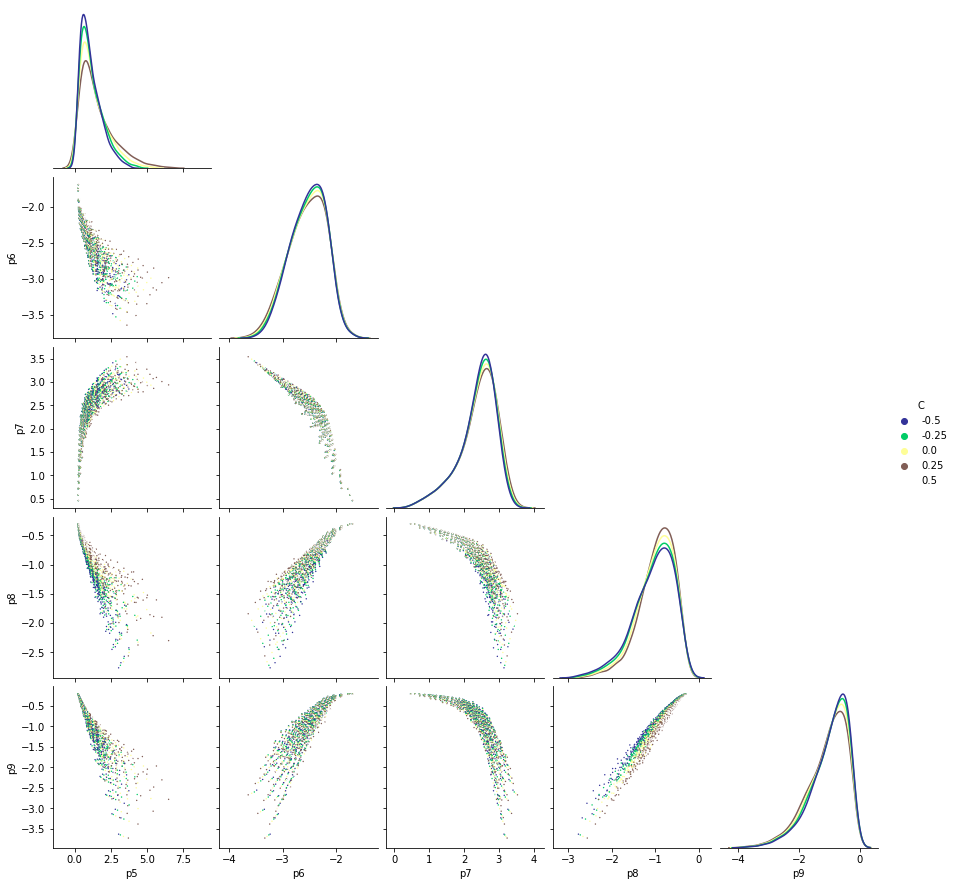

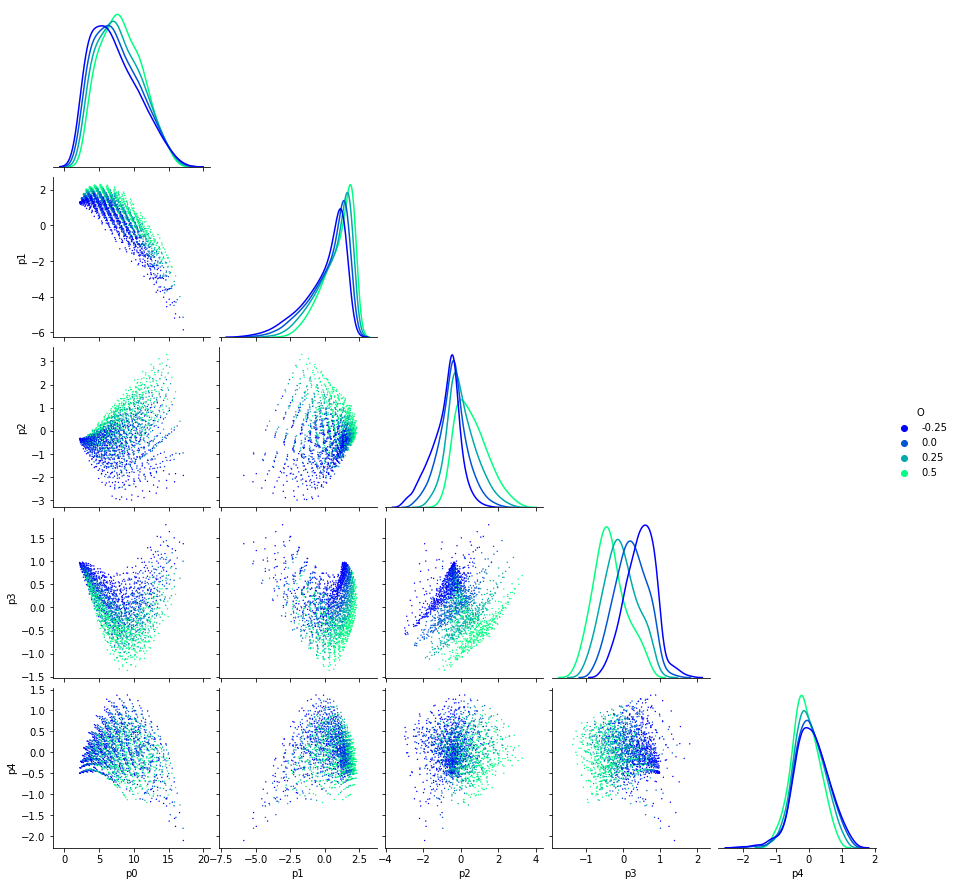

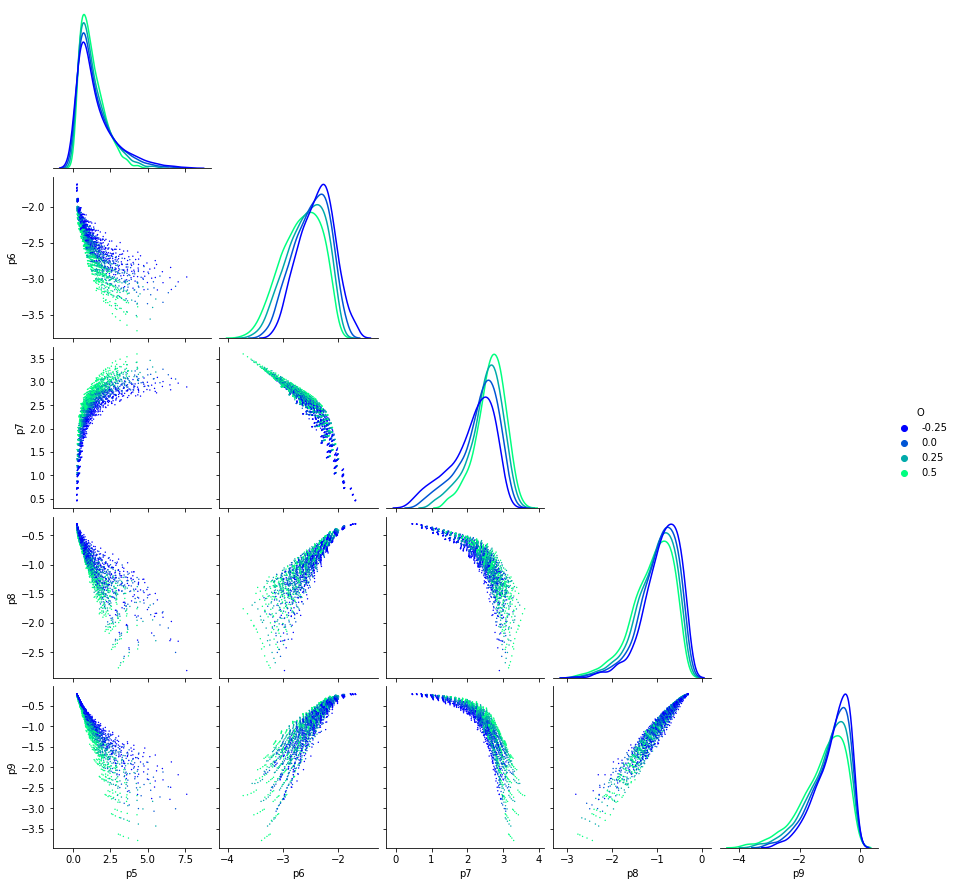

In [58]:
for p in ["F","T","L","C","O"]:
    for i in range(2):
        ds.pp(i, p)

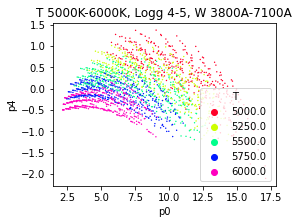

In [59]:
ds.p(0,4,"T")

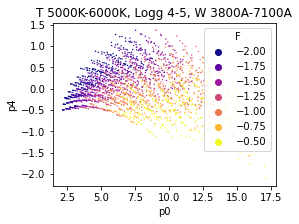

In [60]:
ds.p(0,4,"F")

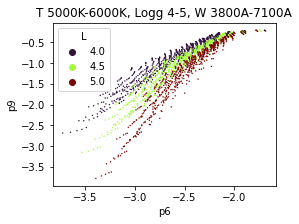

In [61]:
ds.p(6,9,"L")

In [62]:
ds.p(2,3,"O")

TypeError: p() missing 1 required positional argument: 'para'

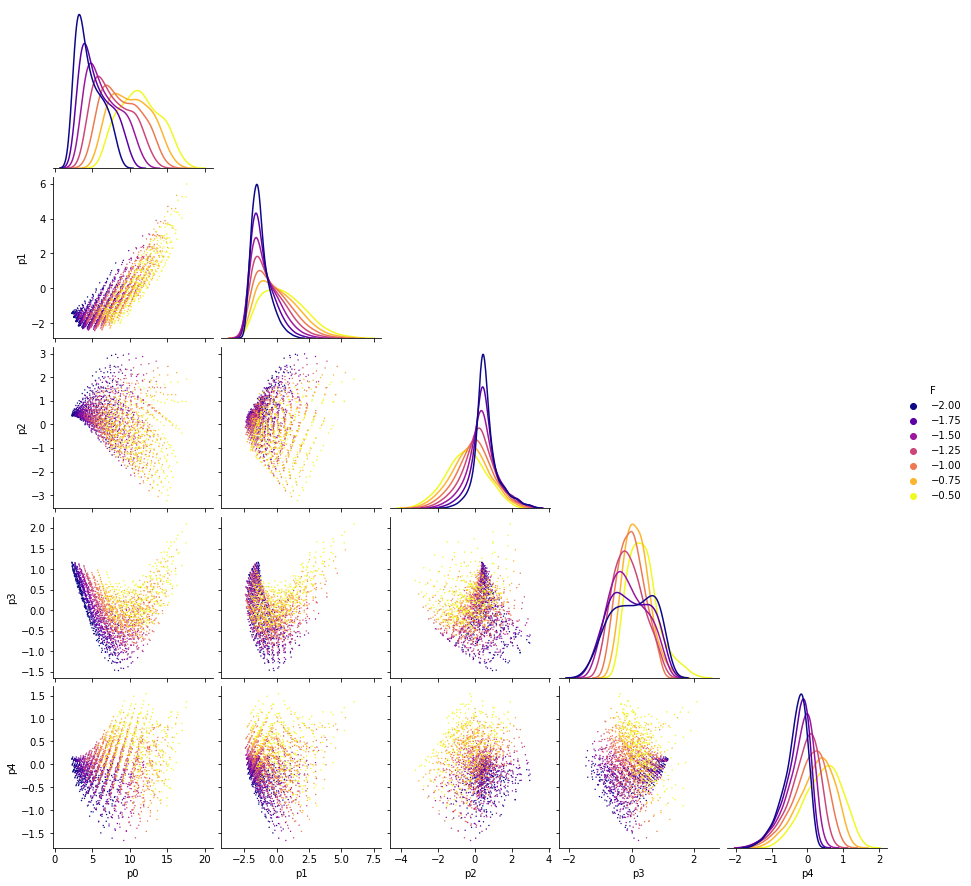

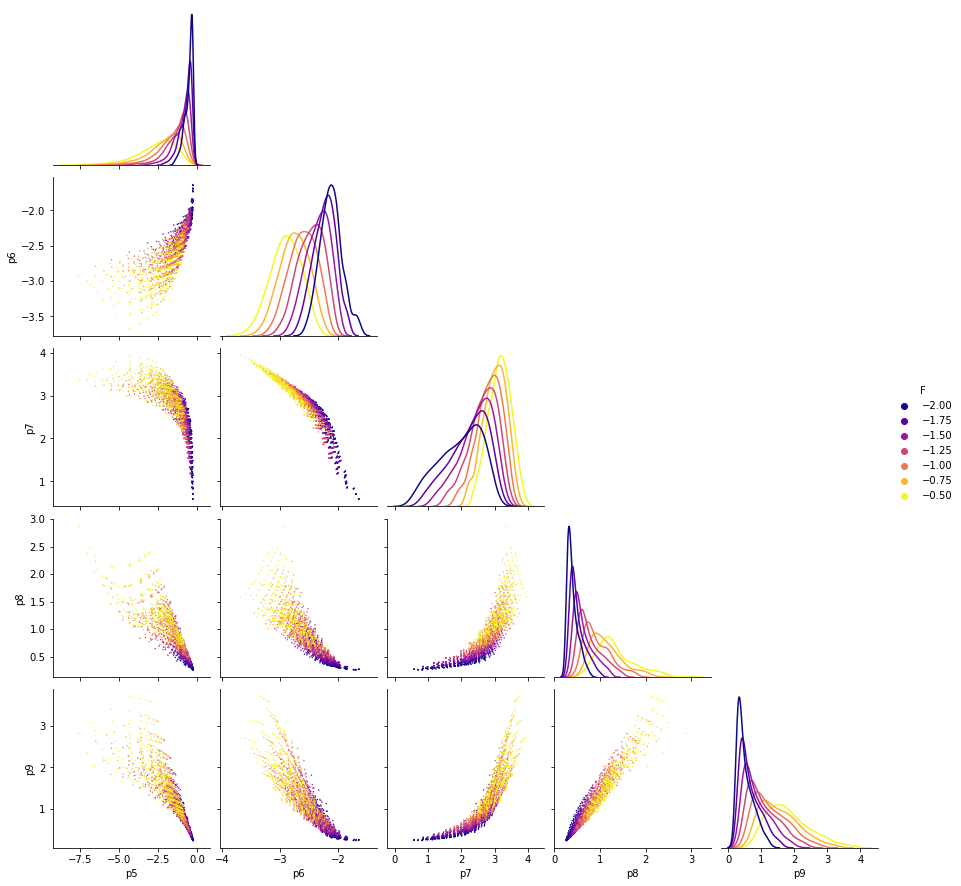

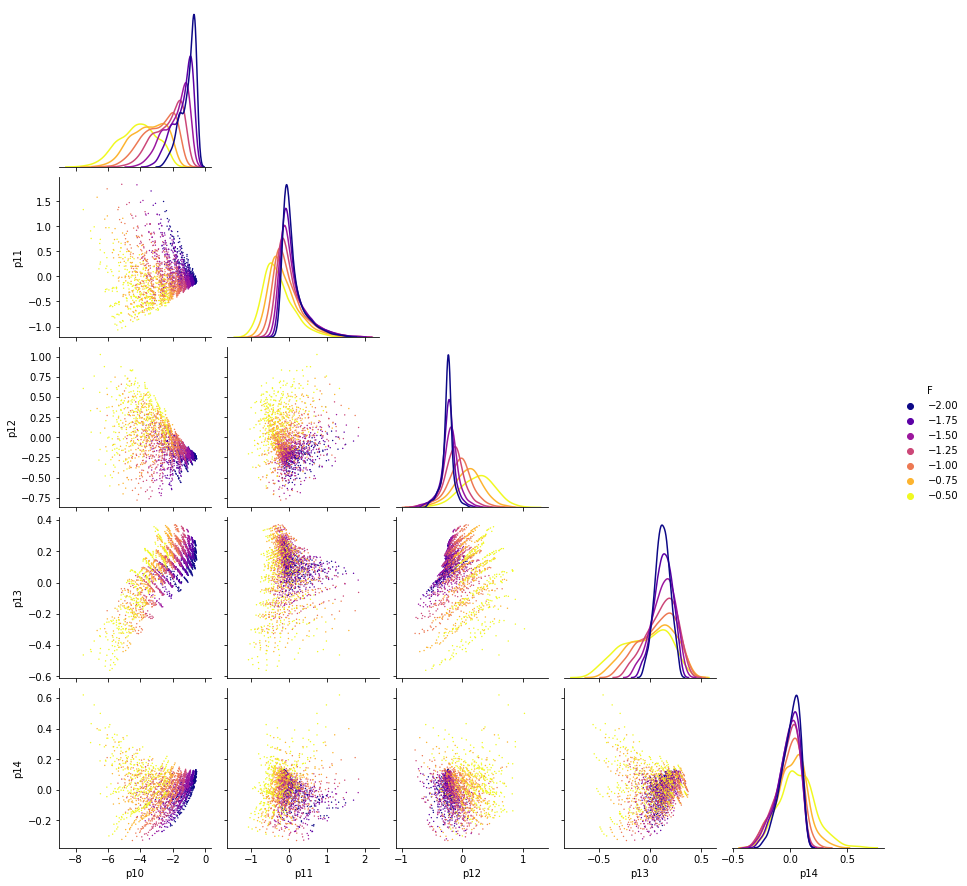

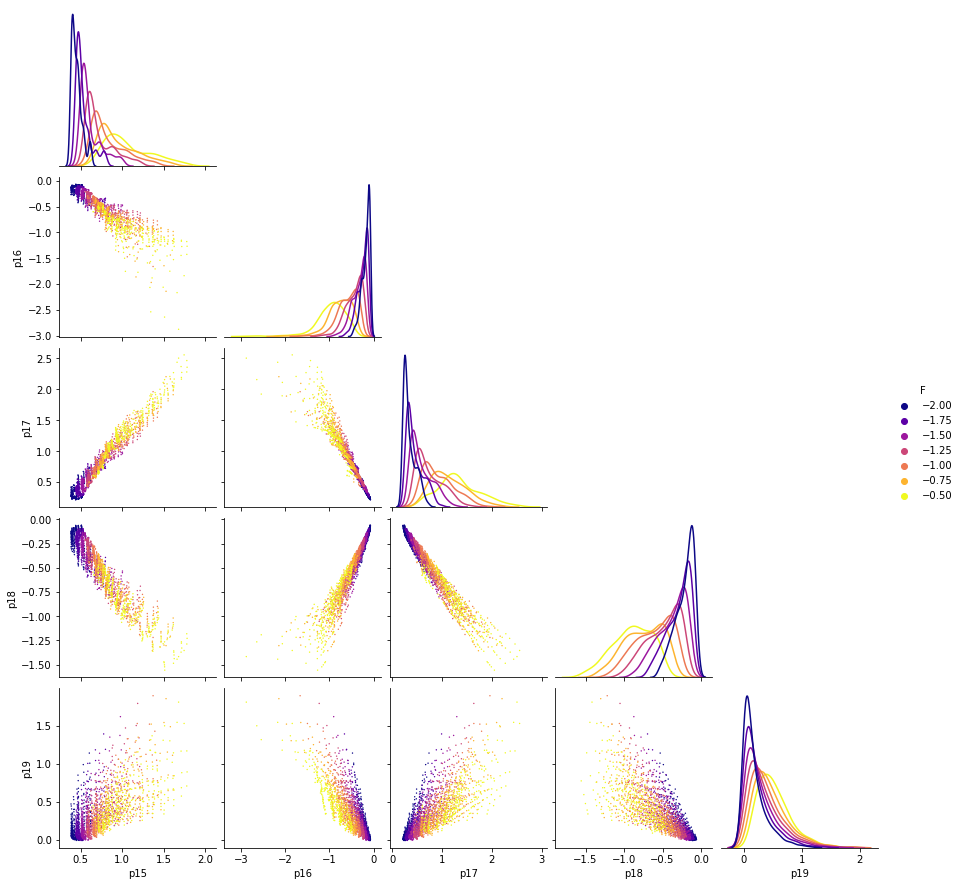

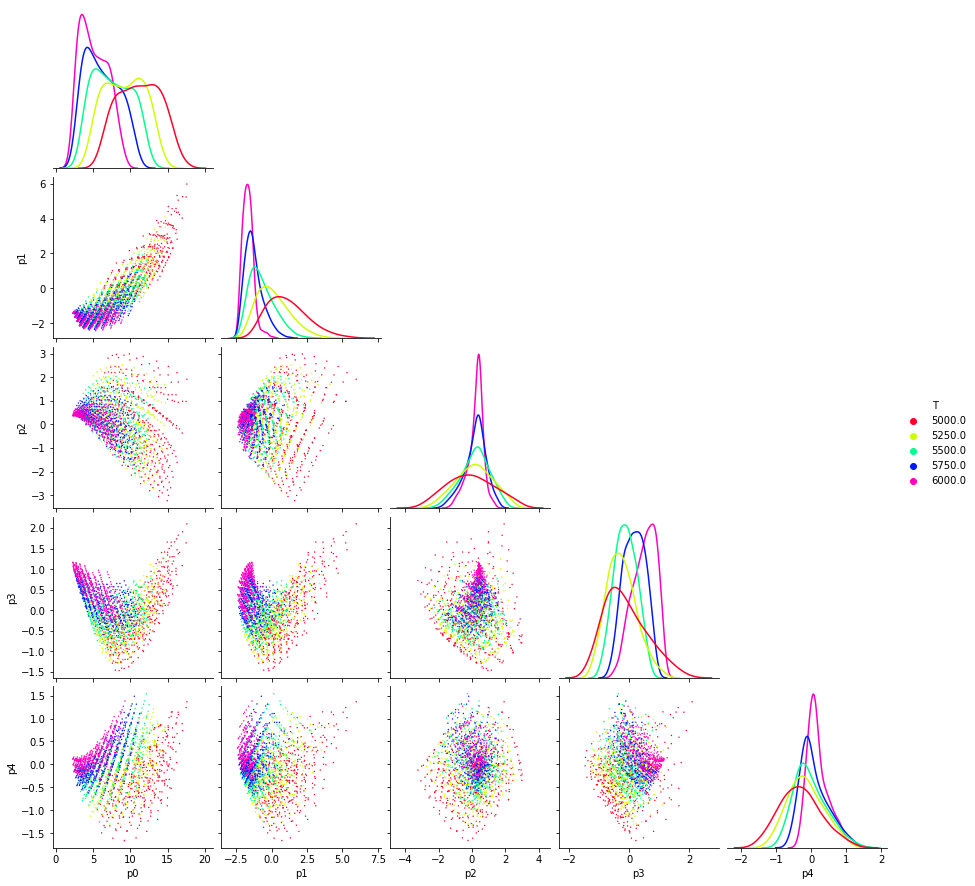

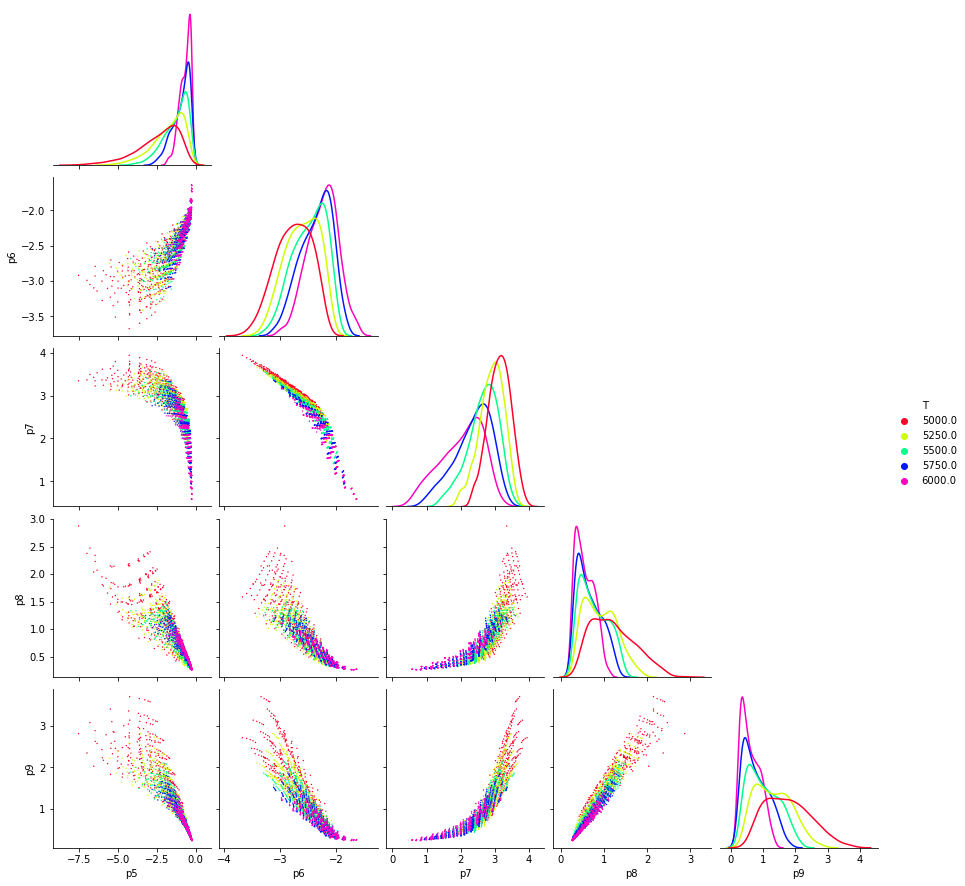

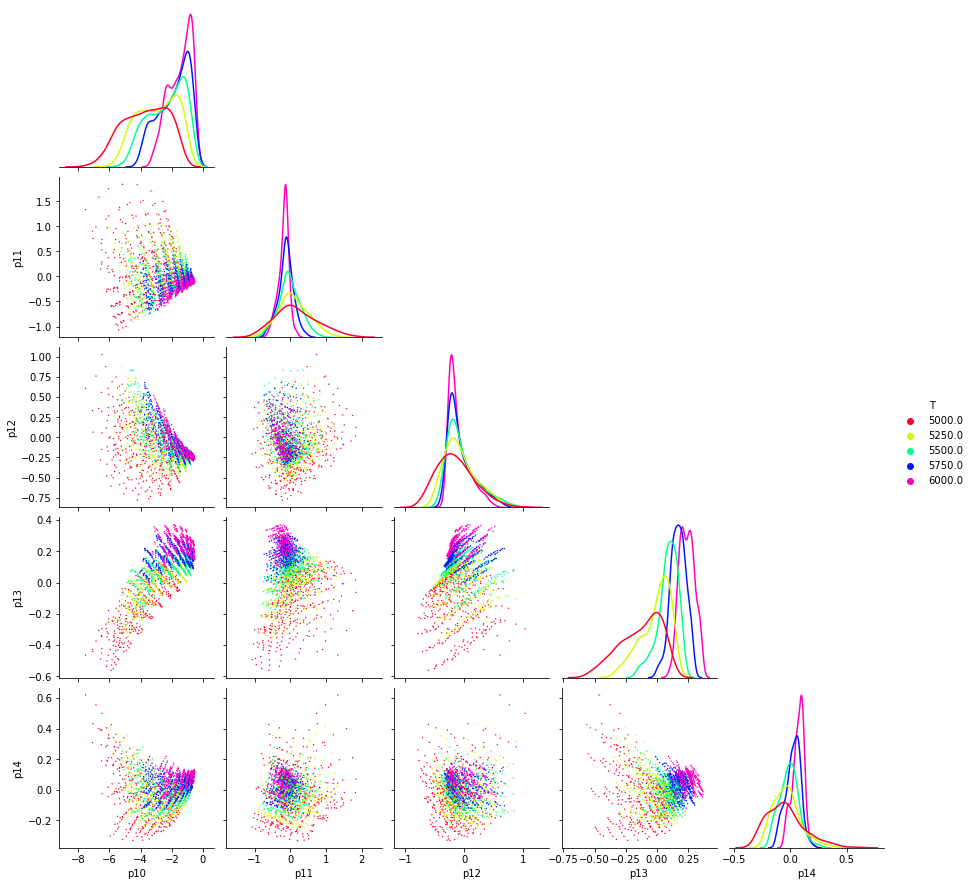

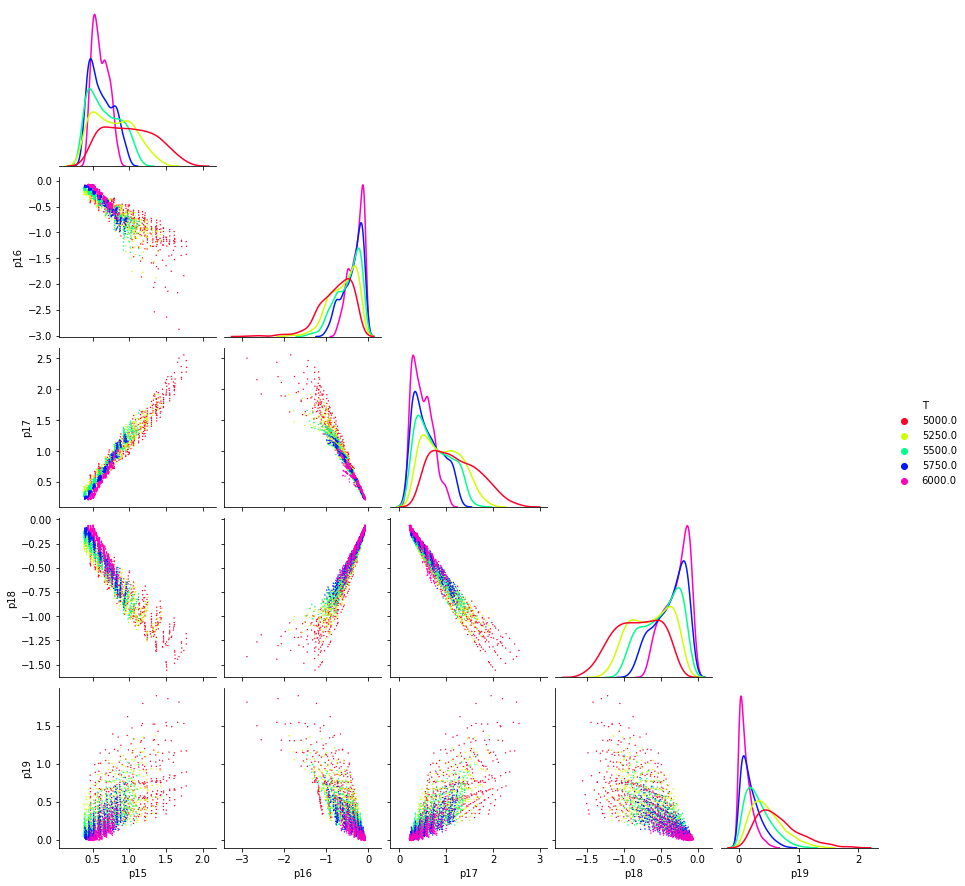

In [ ]:
for p in ["F","T","L","C","O"]:
    for i in range(4):
        ds.pp(i, p)